# Multiple Linear Regression
## Bike_Sharing_Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

Business Goal:

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data

### importing the libraries

In [1141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

### Read CSV file

In [1142]:
bikeSharing = pd.read_csv("day.csv")

In [1143]:
# Check the head of the dataset
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [1144]:
# Shape of the dataset
bikeSharing.shape

(730, 16)

In [1145]:
# info about the dataset
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1146]:
# Describe the data
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1147]:
# columns in the dataset
bikeSharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Step 2: Cleaning the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Create new columns for further analyis and drop columns that are not useful for analysis

In [1148]:
# find days old using dteday column
bikeSharing['days_old'] = (pd.to_datetime(bikeSharing['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [1149]:
# head of the dataset
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [1150]:
# Drop columns with no useful information
bikeSharing.drop(['instant'], axis = 1, inplace = True)
bikeSharing.drop(['dteday'], axis = 1, inplace = True)
bikeSharing.drop(['registered'], axis = 1, inplace = True)
bikeSharing.drop(['casual'], axis = 1, inplace = True)

In [1151]:
# Rename columns yr, mnth, cnt -> year, month, count
bikeSharing.rename(columns = {'yr':'year'}, inplace = True)
bikeSharing.rename(columns = {'mnth':'month'}, inplace = True)
bikeSharing.rename(columns = {'cnt':'count'}, inplace = True)

In [1152]:
# head of the dataset
bikeSharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [1153]:
# info on the dataset
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [1154]:
# finding correlation between the features of the dataset
bikeSharing.corr()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


### Handle Missing and Null values

In [1155]:
# check for null values
bikeSharing.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
count         0
days_old      0
dtype: int64

No missing values found in the dataset

### Handle Outliers values in the dataset

In [1156]:
# check unique values in the dataset
bikeSharing.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
count         695
days_old      730
dtype: int64

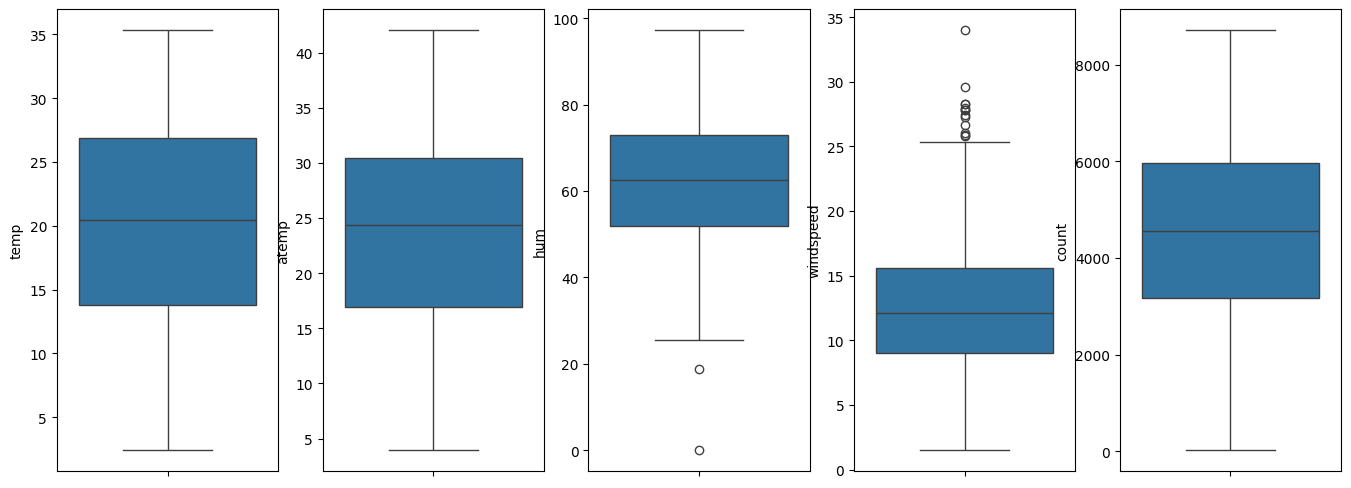

In [1157]:
# Creating box plot for the numerical variables
cols = ['temp', 'atemp', 'hum', 'windspeed','count']
plt.figure(figsize=(20,6))

i = 1
for col in cols:
    plt.subplot(1,6,i)
    sns.boxplot(y=col, data=bikeSharing)
    i+=1

There are no outliers to be handled.

### Convert season, weathersit,month and weekday to categorical types

In [1158]:
bikeSharing.season.replace({1:"spring", 2:"summer", 3:"autumn", 4:"winter"},inplace = True)

bikeSharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing.month = bikeSharing.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'july',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing.weekday = bikeSharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

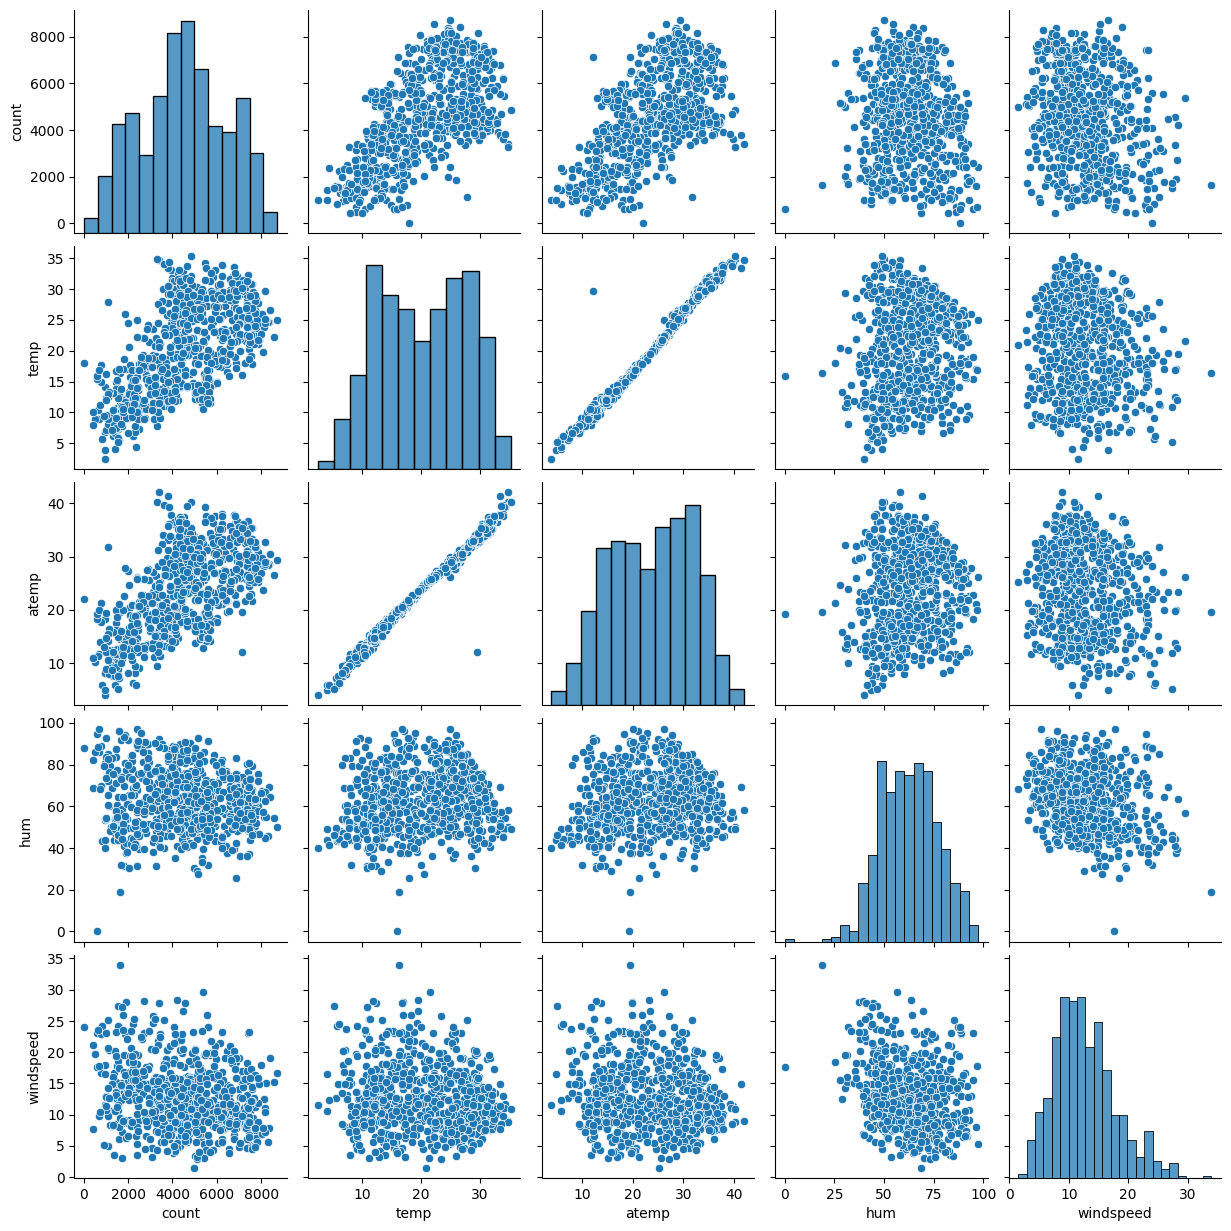

In [1159]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing,vars=['count', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

temp and atemp has the highest corelation with the target variable count

### Find the Correlation by Visualising the Data between the Numerical Variable

Pair Plots

<Figure size 2000x1500 with 0 Axes>

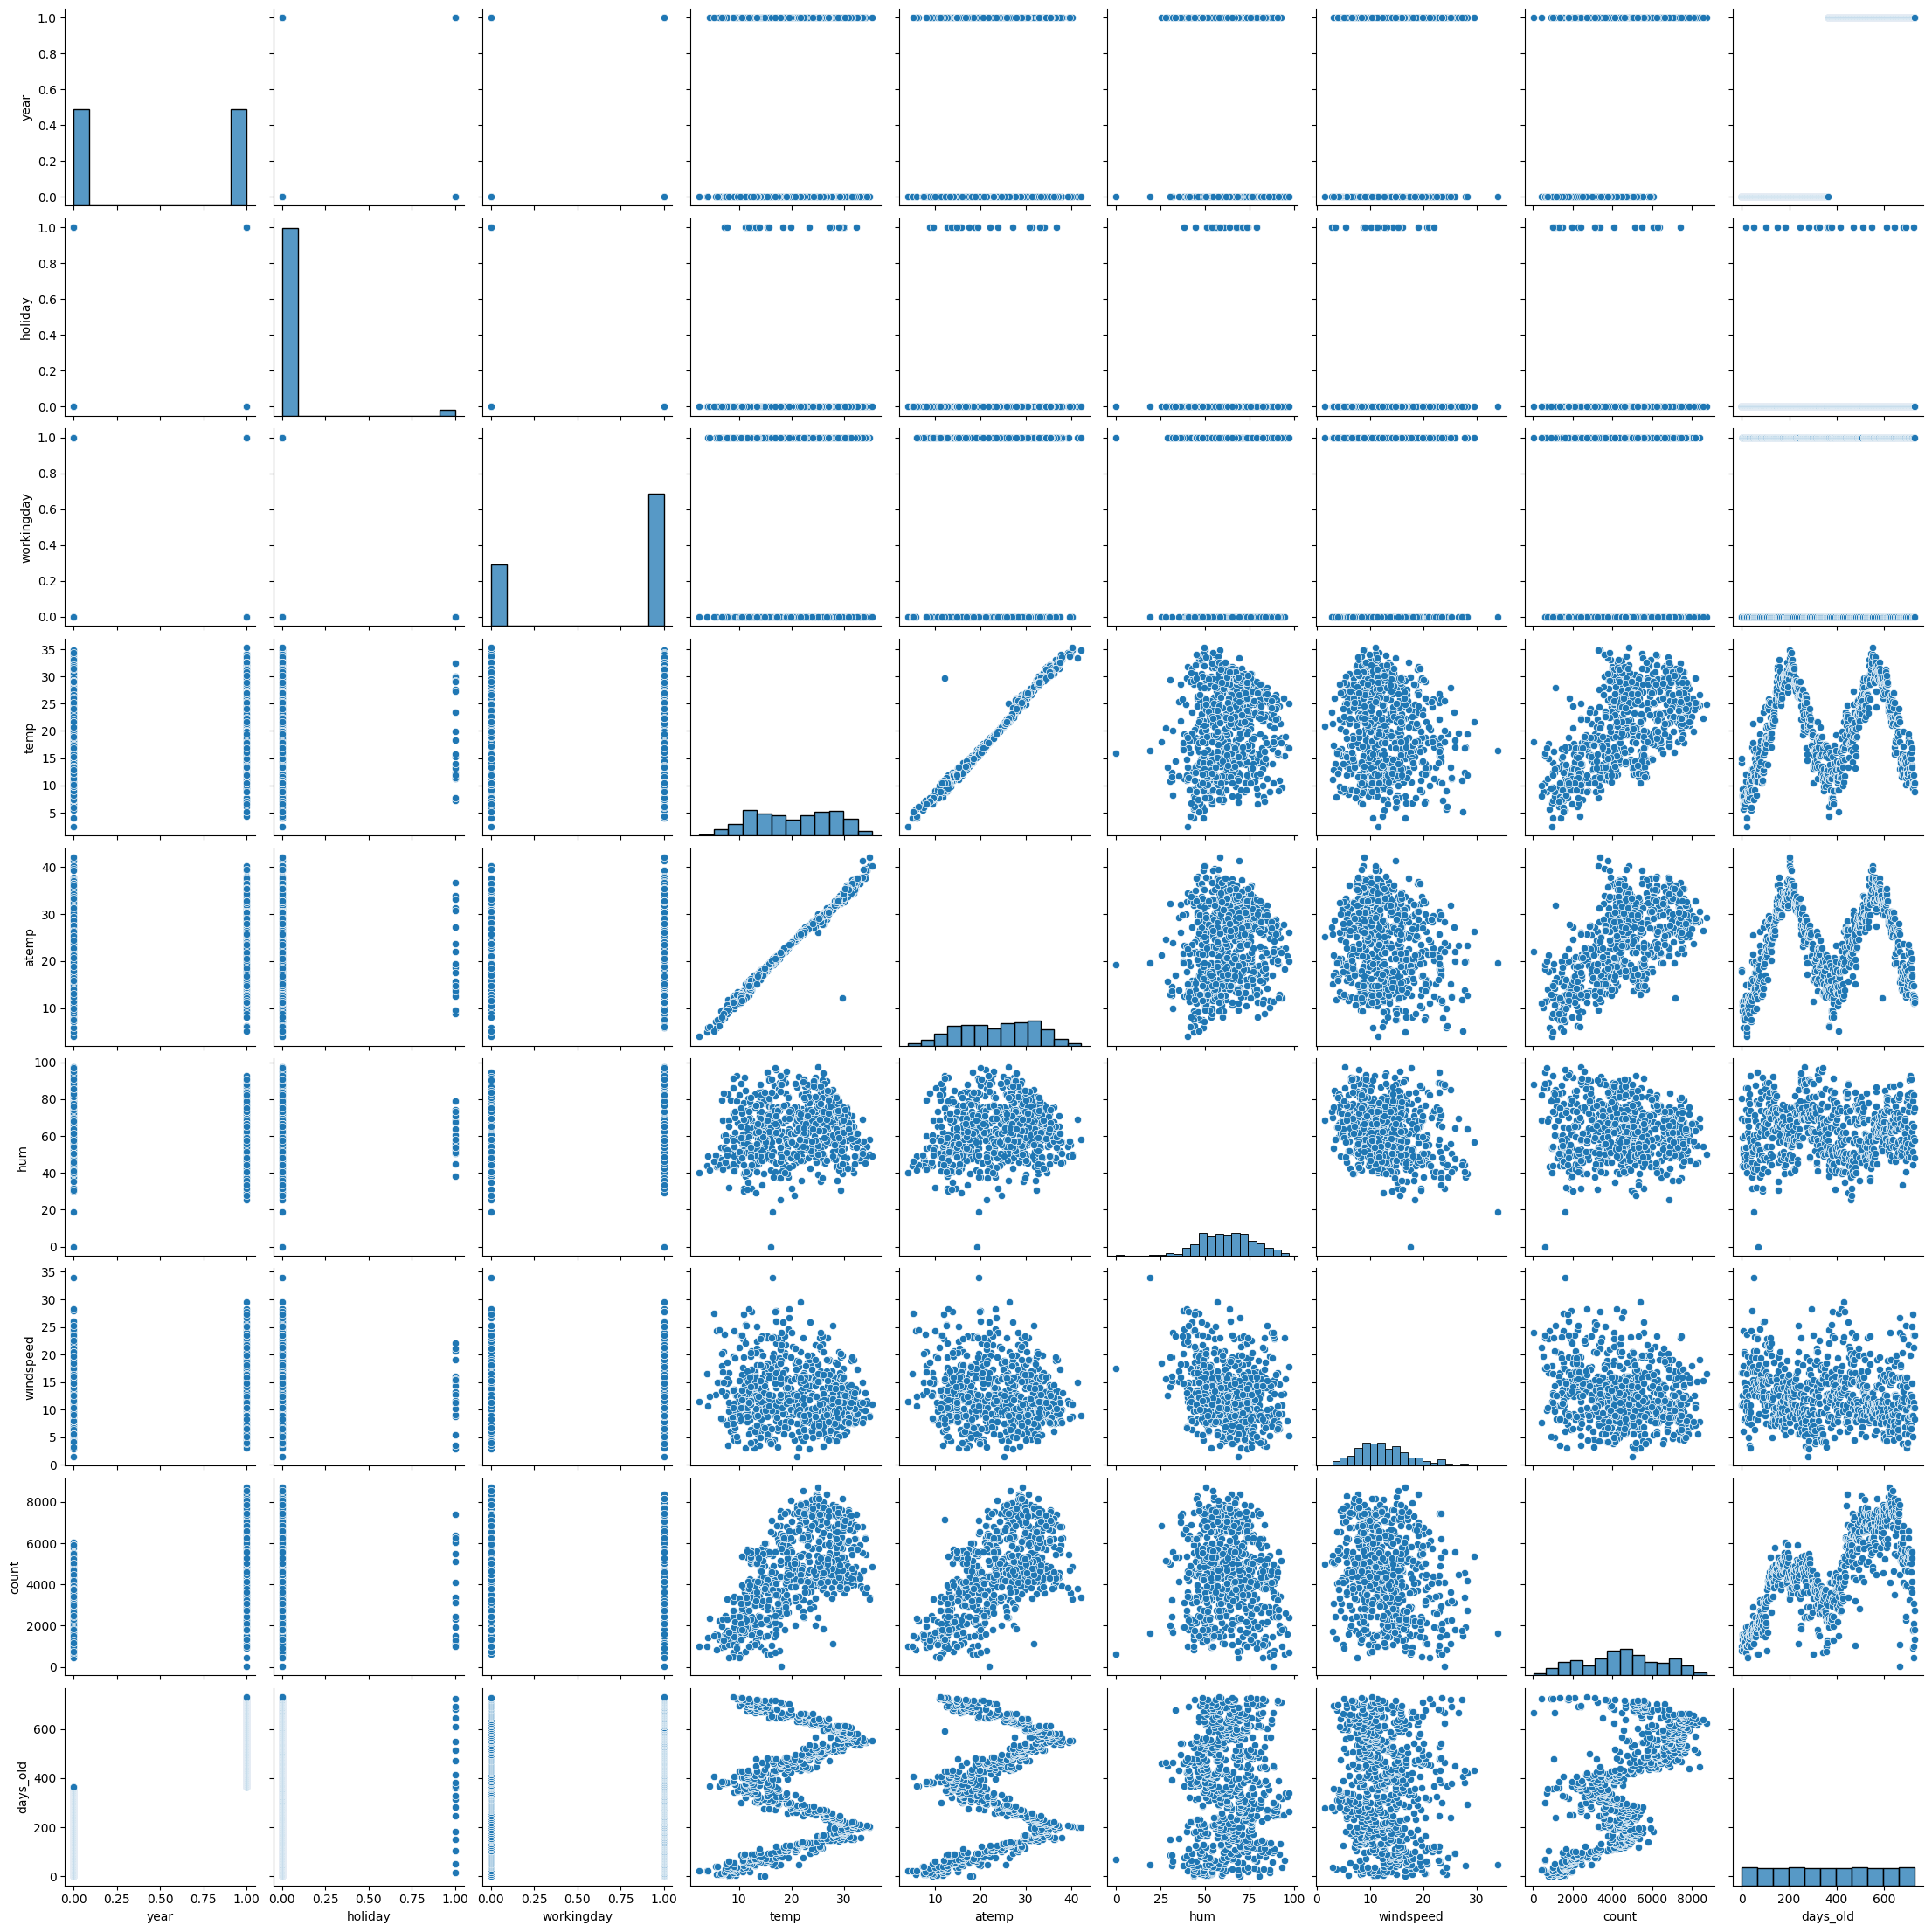

In [1160]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing)
plt.show()

Heat Maps

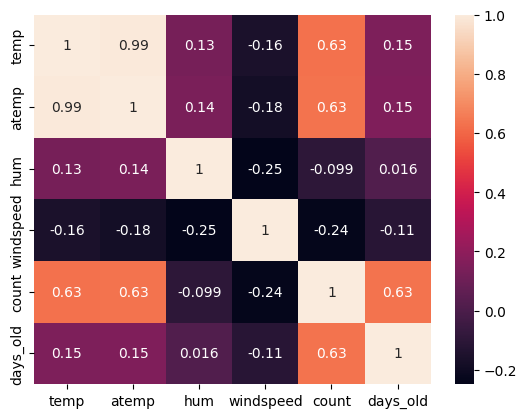

In [1161]:
sns.heatmap(bikeSharing[['temp','atemp','hum','windspeed','count','days_old']].corr(), annot = True)
plt.show()

temp and atemp has correlation >= .99 

### Analysing Categorical Variabels with target variables

Count vs Temperature

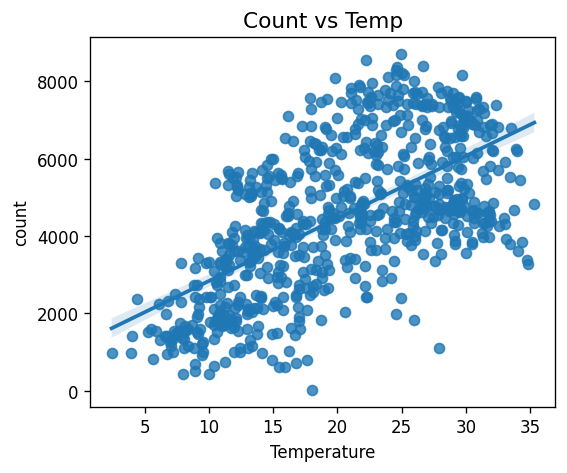

In [1162]:
plt.figure(figsize=(5,4),dpi=120)
plt.title("Count vs Temp",fontsize=13)
sns.regplot(data=bikeSharing,x="temp",y="count")
plt.xlabel("Temperature")
plt.show()

Count vs Humidity

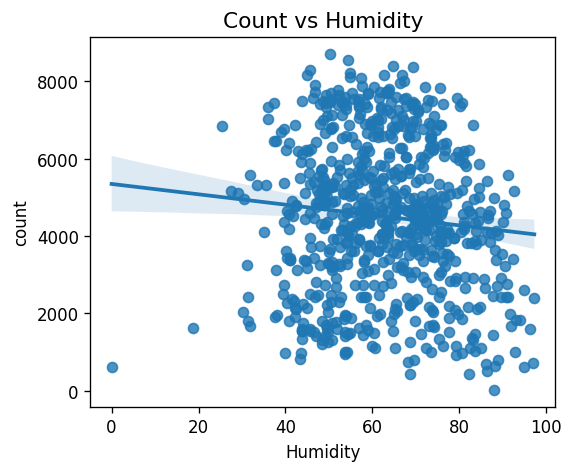

In [1163]:
plt.figure(figsize=(5,4),dpi=120)
plt.title("Count vs Humidity",fontsize=13)
sns.regplot(data=bikeSharing,x="hum",y="count")
plt.xlabel("Humidity")
plt.show()

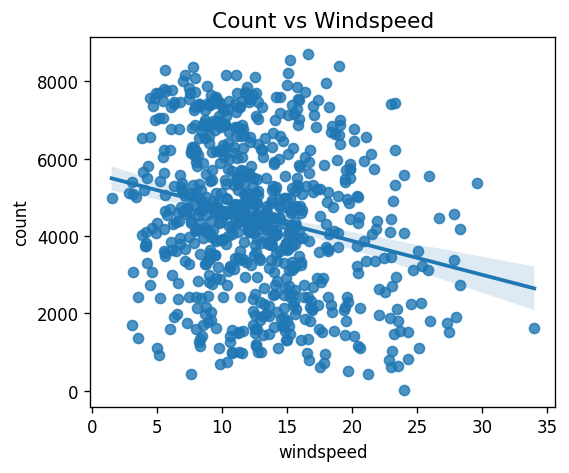

In [1164]:
plt.figure(figsize=(5,4),dpi=120)
plt.title("Count vs Windspeed",fontsize=13)
sns.regplot(data=bikeSharing,x="windspeed",y="count")
plt.show()

Heap map for numeric values

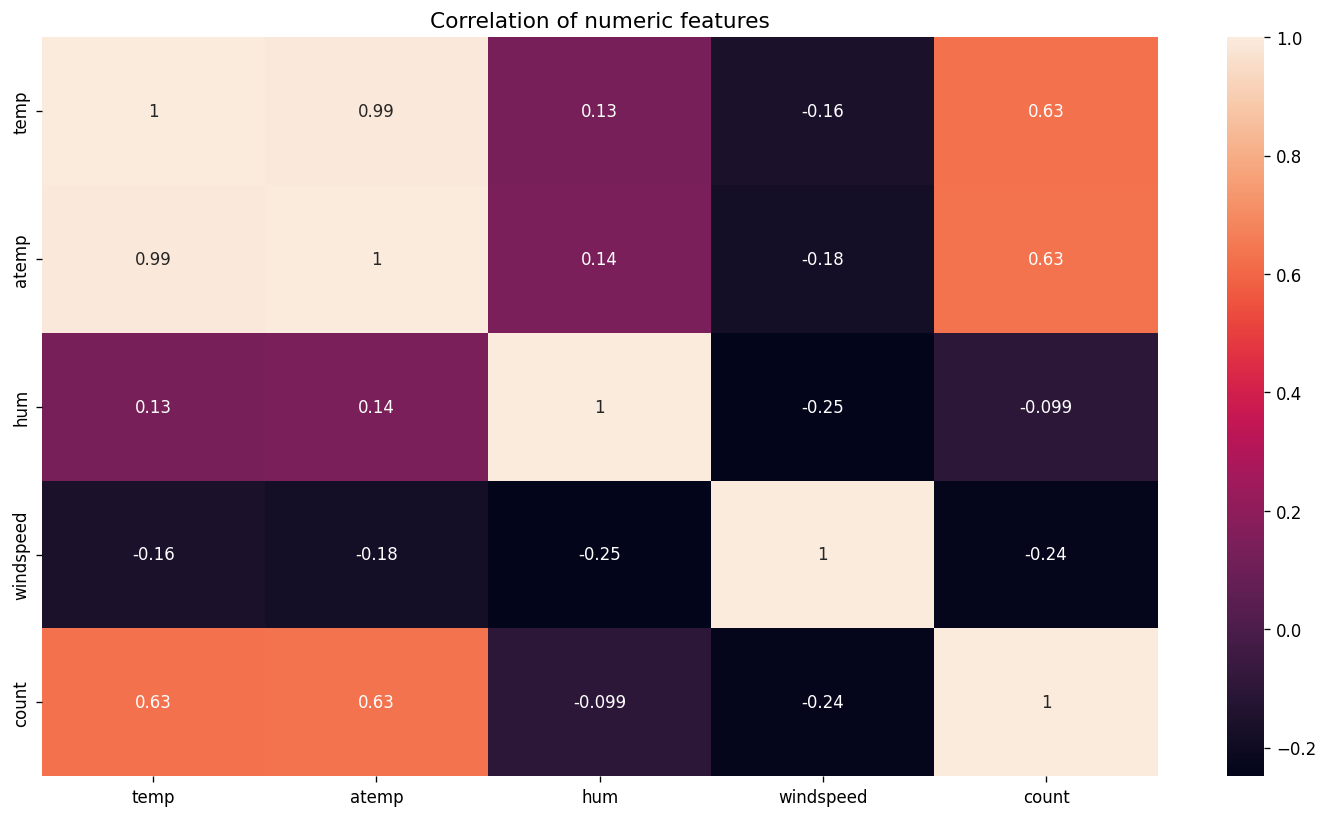

In [1165]:
num_columns = ["temp","atemp","hum","windspeed","count"]
plt.figure(figsize=(15,8),dpi=120)
plt.title("Correlation of numeric features",fontsize=13)
sns.heatmap(bikeSharing[num_columns].corr(),annot= True)
plt.show()

Draw Boxplot for categorical variables to see demands

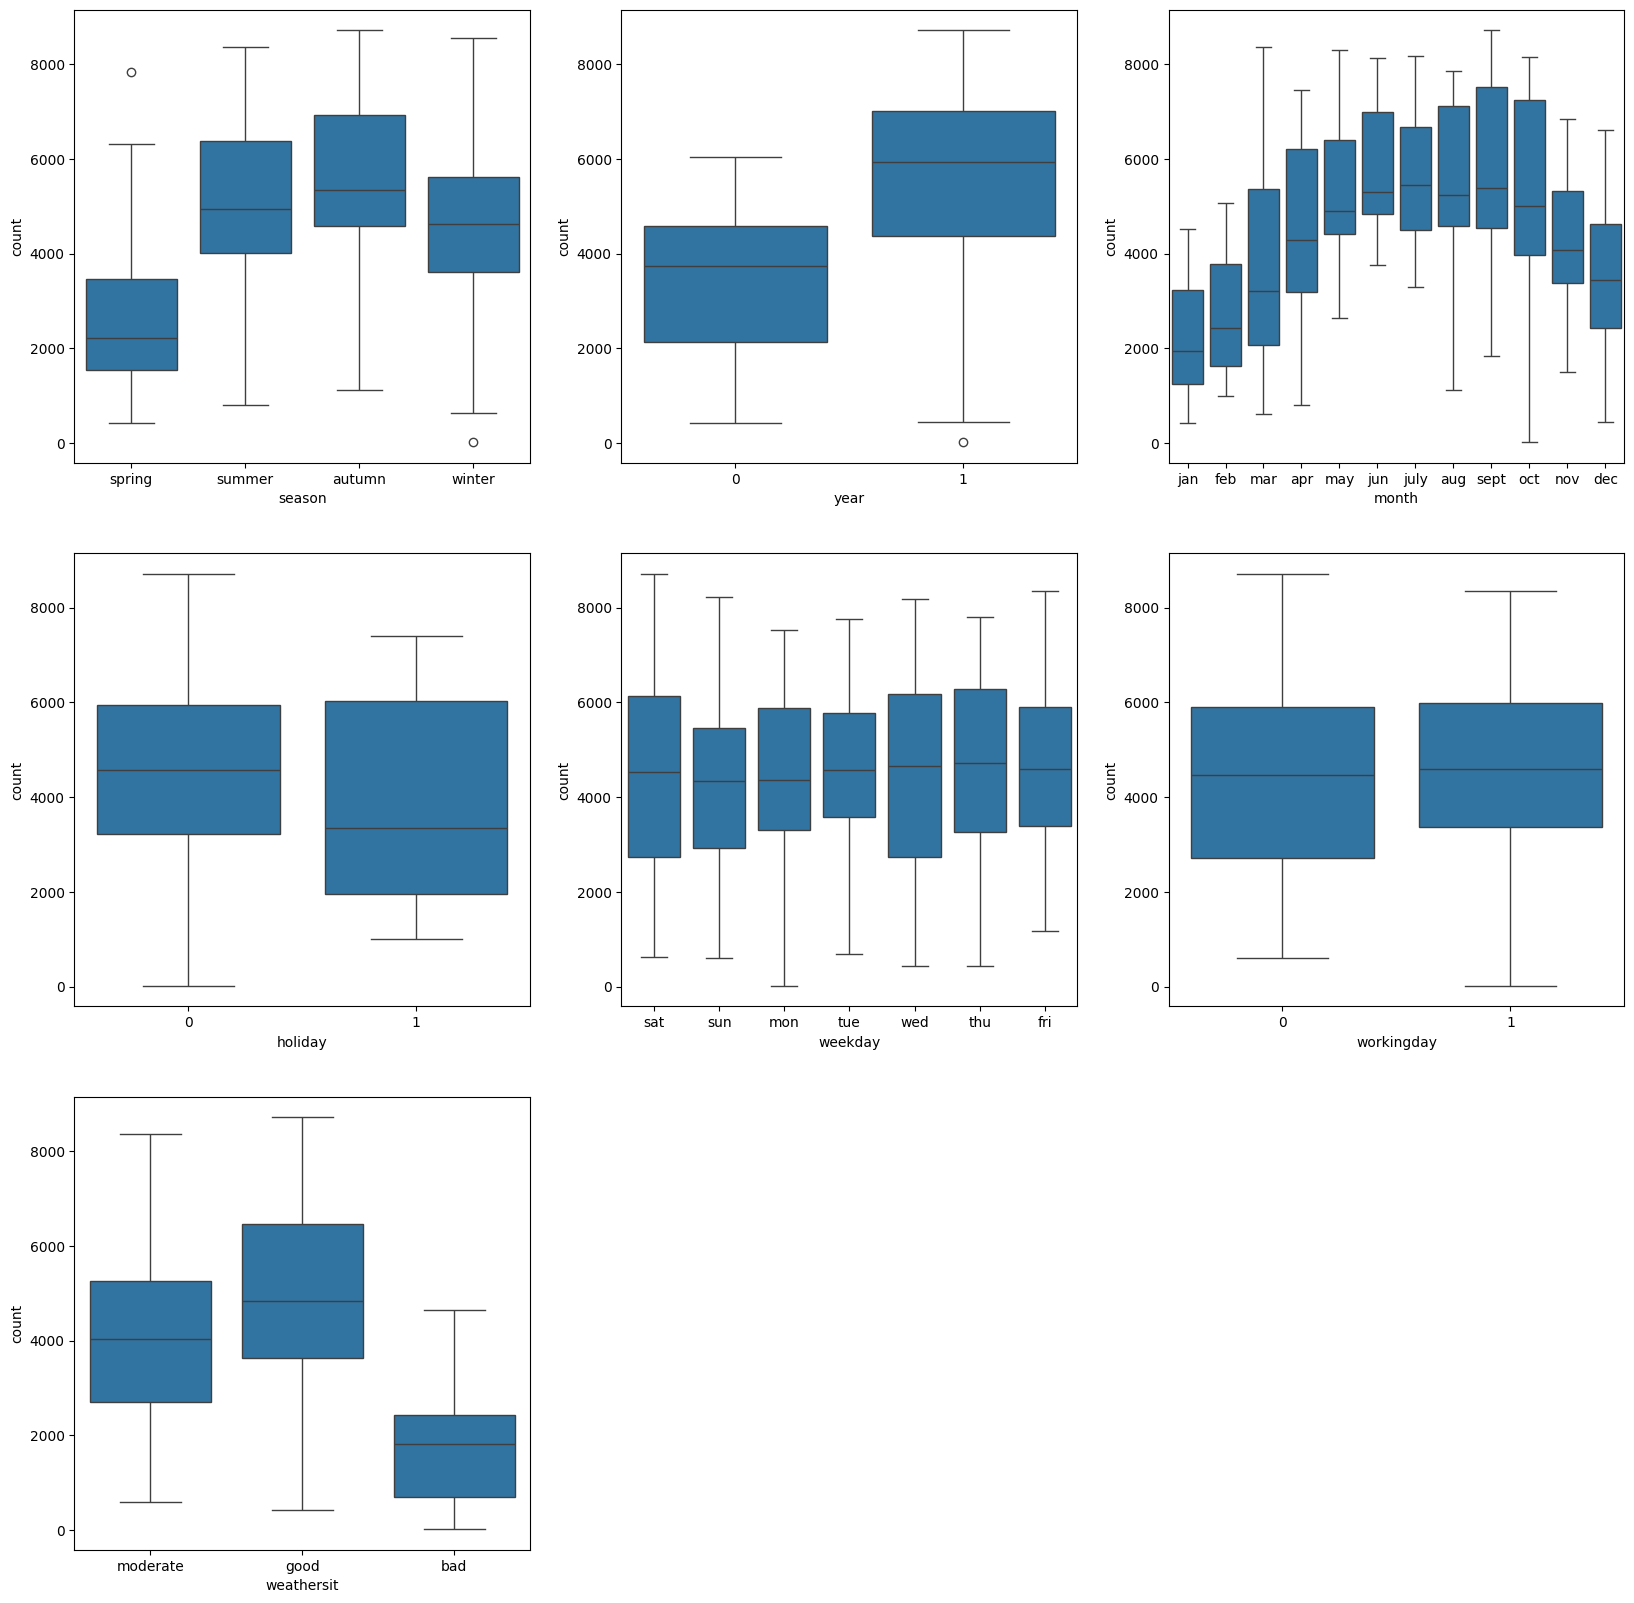

In [1166]:
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 20))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing, x=i[1], y='count')
plt.show()

# Step 3: Data Preparation

### Create dummy variables for all categorical variables

In [1167]:
bikeSharing = pd.get_dummies(data=bikeSharing,columns=["season"],drop_first=True)
bikeSharing = pd.get_dummies(data=bikeSharing,columns=["month"],drop_first=True)
bikeSharing = pd.get_dummies(data=bikeSharing,columns=["weekday"],drop_first=True)
bikeSharing = pd.get_dummies(data=bikeSharing,columns=["weathersit"])

In [1168]:
bikeSharing.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,days_old,season_spring,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,True,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,True,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,True,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,True,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,True,...,False,False,False,False,False,False,True,False,True,False


In [1169]:
bikeSharing.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'count', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [1170]:
bikeSharing.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,count,days_old,season_spring,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,True,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,True,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,True,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,True,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,True,...,False,False,False,False,False,False,True,False,True,False


# Step 4. Split Data into training and test data

### Train test split 

In [1171]:
# Pop count of the bike sharing data
x=bikeSharing
y=bikeSharing.pop('count')
#Train Test split with 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [1172]:
x.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,True,False,...,False,False,False,False,False,False,True,False,True,False


In [1173]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 31)
(219, 31)
(511,)
(219,)


### Rescaling the Features 

There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

In [1174]:
num_columns = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
x_train[num_columns] = scaler.fit_transform(x_train[num_columns])

In [1175]:
x_train.describe()

,year,holiday,workingday,temp,atemp,hum,windspeed,days_old
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1176]:
x_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,False,False,...,False,False,False,False,True,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,False,False,...,False,True,False,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,False,True,...,False,True,False,False,False,False,False,False,True,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,True,False,...,False,False,False,False,False,True,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,False,False,...,False,False,False,False,False,False,True,False,False,True


# Step 5 : Build a linear Model

### Linear Regression fitting

In [1177]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

### Recursive feature elimination

In [1178]:
rfe = RFE(lreg, n_features_to_select=15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

### Build model, Get_VIFs and replace Catergorical variables with numerical variables

In [1179]:
def build_model(cols):
    # replace True with 1 and False with 0
    x_train[cols] = x_train[cols].replace({True: 1, False: 0})
    
    #add constant to predictor variables
    X_train_sm = sm.add_constant(x_train[cols])
    
    res = sm.OLS(y_train, X_train_sm).fit()
    print(res.summary())
    return res

In [1180]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

def get_VIF_Value(cols):
    df1 = x_train[cols]
    # replace all the categorical variables with 1 and 0
    df1 = df1.replace({True: 1, False: 0})
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [1181]:
x_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'days_old', 'season_spring', 'month_oct', 'month_sept', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [1182]:
x_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'season_winter', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_july', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'weekday_mon', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [1183]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   days_old             730 non-null    int64  
 8   season_spring        730 non-null    bool   
 9   season_summer        730 non-null    bool   
 10  season_winter        730 non-null    bool   
 11  month_aug            730 non-null    bool   
 12  month_dec            730 non-null    bool   
 13  month_feb            730 non-null    bool   
 14  month_jan            730 non-null    bool   
 15  month_july           730 non-null    boo

### 1. Model with all variables selected by RFE

In [1184]:
cols = ['year', 'holiday', 'workingday','temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_jan', 'month_july', 'month_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.52e-183
Time:                        11:29:27   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

Drop month_jan -> -ve cofficient and higher p-value

In [1185]:
cols = ['year', 'holiday', 'workingday','temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.59e-184
Time:                        11:29:27   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

Drop hum as it is having high -ve cofficient and high p value

In [1186]:
cols = ['year', 'holiday', 'workingday','temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.46e-181
Time:                        11:29:27   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

Drop holiday column as it is having high -ve cofficient and hight p value

In [1187]:
cols = ['year','workingday','temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.56e-182
Time:                        11:29:27   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

Drop month_july column as it is having high -ve cofficient and hight p value

In [1188]:
cols = ['year', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.57e-182
Time:                        11:29:27   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

Drop temp column as it is having high cofficient value

In [1189]:
cols = ['year', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.84e-150
Time:                        11:29:28   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4634.1026    

Replace July with spring as both were highly correlated

In [1190]:
cols = ['year', 'workingday', 'windspeed', 'month_july',
       'season_summer', 'season_winter', 'month_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           3.93e-97
Time:                        11:29:28   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2851.5231    

Remove windspeed with spring as windspeed was highly correlated with temp

In [1191]:
cols = ['year', 'workingday', 'season_spring', 'month_july',
       'season_summer', 'season_winter', 'month_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.90e-146
Time:                        11:29:28   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4162.3897    

Consider Weekend "Sunday" as a holiday replace it with "saturday"

In [1192]:
cols = ['year', 'workingday', 'season_spring', 'month_july',
       'season_summer', 'season_winter', 'month_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          6.32e-145
Time:                        11:29:28   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4479.8636    

Remove 'season_summer' and 'workingday' and add temperature as a predictor variable

In [1193]:
cols = ['year', 'season_spring', 'month_july',
        'season_winter', 'month_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

build_model(cols)
get_VIF_Value(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.33e-179
Time:                        11:29:28   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

# Step 6: Model Evaluation

### Residual Analysis

In [1194]:
def build_model_sk(X,y):
    lr = LinearRegression()
    lr.fit(X,y)
    return lr

In [1195]:
vars = ['year', 'season_spring', 'month_july',
        'season_winter', 'month_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(x_train[vars],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436189 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


In [1196]:
y_train_pred = lr.predict(x_train[cols])

Text(0.5, 0, 'Errors')

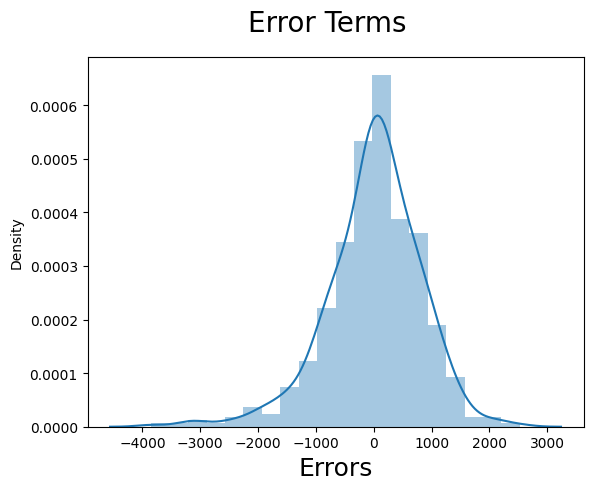

In [1197]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        

Predict values for test data set

In [1198]:
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
x_test[num_vars] = scaler.transform(x_test[num_vars])

In [1199]:
cols = ['year', 'season_spring', 'month_july',
        'season_winter', 'month_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(x_test[cols])

### R-Squared value for test predictions

In [1200]:
r2_score(y_test,y_test_pred)

0.8159036088393239

### Linearity Check

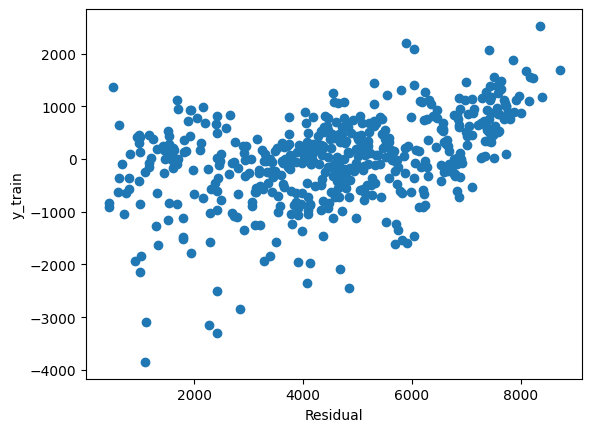

In [1201]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

Making Predictions

Text(0, 0.5, 'y_test_pred')

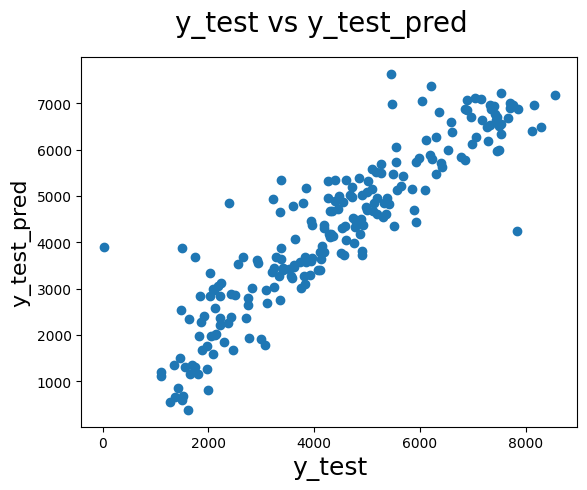

In [1202]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Making Predictions

In [1203]:
vars = ['year', 'season_spring', 'month_july',
        'season_winter', 'month_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(vars)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.33e-179
Time:                        11:29:34   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

### Results Interepretation

Future prediction

Company should focus on expanding business during Spring, September month.

Less business in Light Snow or Rain

Business will increase once corono period will over.

Should focus on services the bikes  as well in off seaons.

Final Verdict 
Once the situation will come back to normal, the company should come up with new and exciting offers during spring when the weather is good in september month.

Significant variables to predict the demand for shared bikes
temp,holiday,hum,windspeed,season,months(January, july, September, November, December), Year (2019) and Sunday are significant variables to predict the demand for shared bikes.
weathersit( Light Snow, Mist + Cloudy)